# Library

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe, fe

%reload_ext autoreload

# Load dataset

In [38]:
df = sns.load_dataset("titanic")

# head vs tail

In [5]:
describe.sample_data(df[["survived", "pclass", "sex", "age"]],n=10)

,survived,pclass,sex,age,,survived,pclass,sex,age
0,0,3,male,22.0,< head | tail >,0,3,male,33.0
1,1,1,female,38.0,< head | tail >,0,3,female,22.0
2,1,3,female,26.0,< head | tail >,0,2,male,28.0
3,1,1,female,35.0,< head | tail >,0,3,male,25.0
4,0,3,male,35.0,< head | tail >,0,3,female,39.0
5,0,3,male,NaN,< head | tail >,0,2,male,27.0
6,0,1,male,54.0,< head | tail >,1,1,female,19.0
7,0,3,male,2.0,< head | tail >,0,3,female,NaN
8,1,3,female,27.0,< head | tail >,1,1,male,26.0
9,1,2,female,14.0,< head | tail >,0,3,male,32.0


# Describe data

In [99]:
describe.describe_data(df)

Pandas Apply:   0%|          | 0/15 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

'table size 891 x 15'

Dataframe has 15 columns.
There are 15 columns that have missing values.


,column_names,Data Type,Count,Missing,% missing,Low value,Q1,Mean,Median,Q3,Hi value,Mode,Stddev,Skewness,Skewness note,Uniques
0,survived,int64,891,0,0.00,0,0,0,0,1,1,0,0,0,Fairly Symmetric (Positive),2
1,pclass,int64,891,0,0.00,1,2,2,3,3,3,3,1,-1,Moderately Negatively Skewed,3
2,sex,object,891,0,0.00,0,0,0,0,0,0,0,0,0,non-numeric,2
3,age,float64,714,177,19.87,0,20,30,28,38,80,24,15,0,Fairly Symmetric (Positive),88
4,sibsp,int64,891,0,0.00,0,0,1,0,1,8,0,1,4,Highly Positively Skewed,7
5,parch,int64,891,0,0.00,0,0,0,0,0,6,0,1,3,Highly Positively Skewed,7
6,fare,float64,891,0,0.00,0,8,32,14,31,512,8,50,5,Highly Positively Skewed,248
7,embarked,object,889,2,0.22,0,0,0,0,0,0,0,0,0,non-numeric,3
8,class,category,891,0,0.00,0,0,0,0,0,0,0,0,0,non-numeric,3
9,who,object,891,0,0.00,0,0,0,0,0,0,0,0,0,non-numeric,3


Pandas Apply:   0%|          | 0/15 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

'table size 891 x 15'

Dataframe has 15 columns.
There are 15 columns that have missing values.


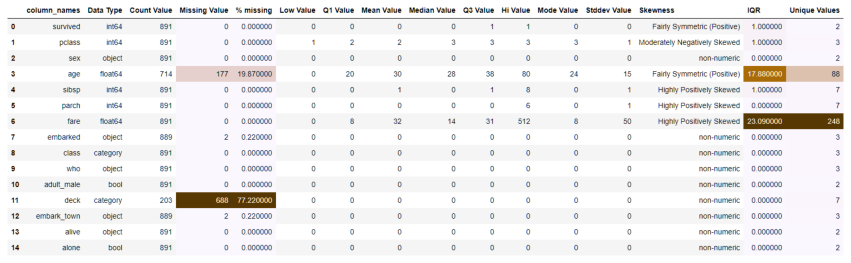

In [95]:
res = describe.describe_data(df,image=True)

In [8]:
describe.describe_num(df)

,count,mean,std,min,25%,50%,75%,max
survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
sibsp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [9]:
describe.n_large_small(df,'age',5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
630,1,1,male,80.00,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.00,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
493,0,1,male,71.00,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
116,0,3,male,70.50,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [10]:
describe.unique(df,r=0.1)

survived column has : 2 distinct values
[0 1]

pclass column has : 3 distinct values
[3 1 2]

sex column has : 2 distinct values
['male' 'female']

age column has : 89 distinct values
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

sibsp column has : 7 distinct values
[1 0 3 4 2 5 8]

parch column has : 7 distinct values
[0 1 2 5 3 4 6]

fare column has : 248 distinct values

embarked column has : 4 distinct values
['S' 'C' 'Q' nan]

class column has : 3 distinct values
['Third', 'First', 'Second']
Categories (3,

In [11]:
describe.value_counts(df,"sex")

,sex,n_samples,percent
0,male,577,64.76
1,female,314,35.24


In [12]:
describe.group_describe(df[["sex",'age']],["sex"])

age                                                    
        count       mean        std   min   25%   50%   75%   max
sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0

In [14]:
describe.group_describe_2(df,"int64",5)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,,,,,,,,,,,,,,
0,549,549,424,549,549,549,549,549,549,549,67,549,549,549
1,342,342,290,342,342,342,340,342,342,342,136,340,342,342


,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
pclass,,,,,,,,,,,,,,
1,216,216,186,216,216,216,214,216,216,216,175,214,216,216
2,184,184,173,184,184,184,184,184,184,184,16,184,184,184
3,491,491,355,491,491,491,491,491,491,491,12,491,491,491


In [ ]:
describe.profiling(df,"titanic","result.html")

In [9]:
describe.crosstab(df,"is_guest_login", "protocol_type",'normal')

protocol_type,icmp,tcp,udp,All
is_guest_login,,,,
0,2833545,1866507,194288,4894340
1,0,4091,0,4091
All,2833545,1870598,194288,4898431


In [10]:
describe.crosstab(df,"is_guest_login", "protocol_type",'percent')

protocol_type,icmp,tcp,udp,All
is_guest_login,,,,
0,0.578943,0.381360,0.039696,1.0
1,0.000000,1.000000,0.000000,1.0
All,0.578460,0.381877,0.039663,1.0


In [31]:
describe.pivot(df,val='rerror_rate',col='protocol_type',row="is_guest_login",
               aggfunc=np.mean,fv=0)

,Class icmp,Class tcp,Class udp
is_guest_login,,,
0,0.00%,15.13%,0.00%
1,0.00%,0.11%,0.00%


In [6]:
describe.pivot_table(df[["duration", "protocol_type", "service", "flag", "src_bytes"]],"kddcup.html")

In [12]:
describe.sweetviz(df[["duration", "protocol_type", "service", "flag", "src_bytes",'label']],
                  None,"kddcup.html")


                                   |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |███                  | [ 14%]   00:03  -> (00:20 left)
:duration:                         |███                  | [ 14%]   00:03  -> (00:20 left)
:duration:                         |██████               | [ 29%]   01:47  -> (02:47 left)
:protocol_type:                    |██████               | [ 29%]   01:47  -> (02:47 left)
:protocol_type:                    |█████████            | [ 43%]   01:48  -> (01:35 left)
:service:                          |█████████            | [ 43%]   01:48  -> (01:35 left)
:service:                          |████████████         | [ 57%]   01:49  -> (00:51 left)
:flag:                             |████████████         | [ 57%]   01:49  -> (00:51 left)
:flag:                             |███████████████      | [ 71%]   01:50  -> (00:24 left

Creating Associations graph... DONE!
Report kddcup.html.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
describe.pandas_gui(df)

In [ ]:
describe.aggregate(df[["duration", "protocol_type", "service", "flag", "src_bytes",'label']],'label')

## Missing data 

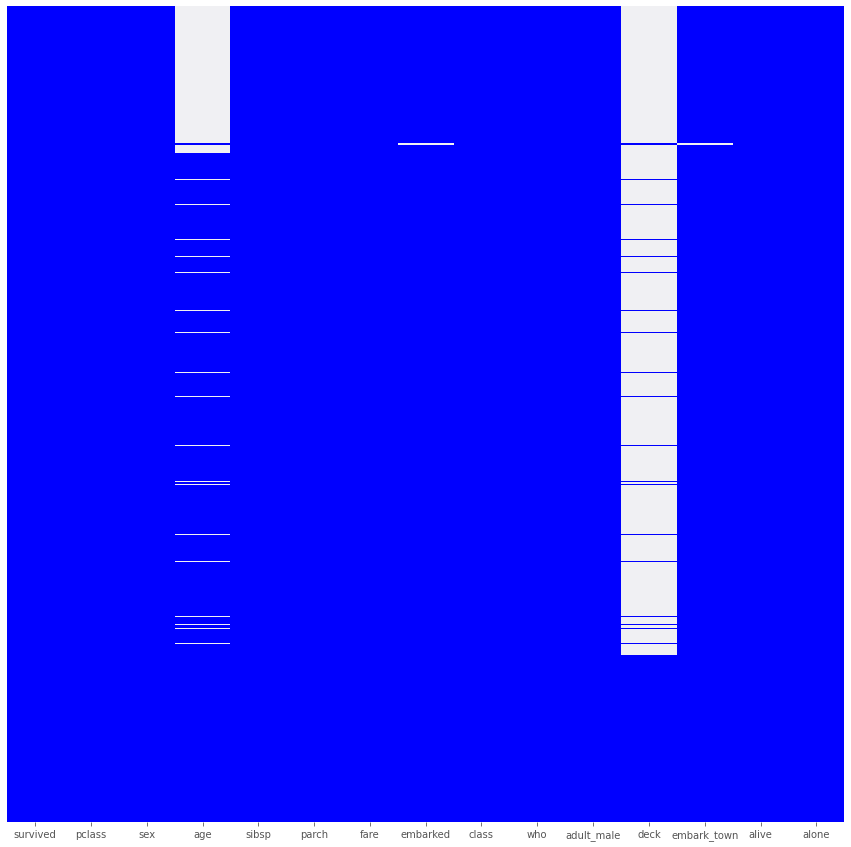

In [23]:
describe.heatmap_mv(df)

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


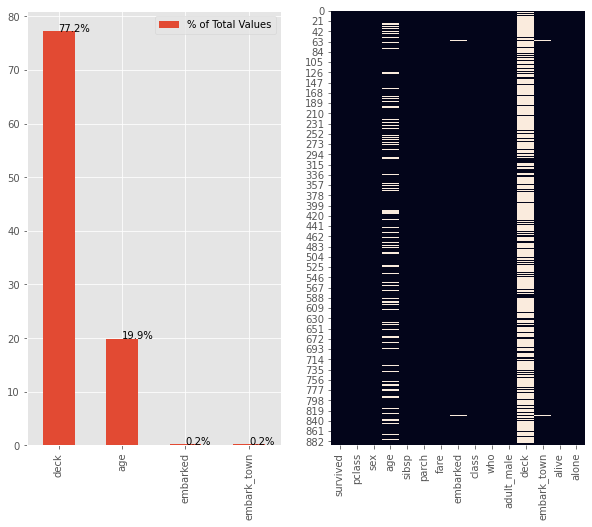

,Missing Values,% of Total Values
deck,688,77.2
age,177,19.9
embarked,2,0.2
embark_town,2,0.2


In [40]:
describe.missing_values_table(df)

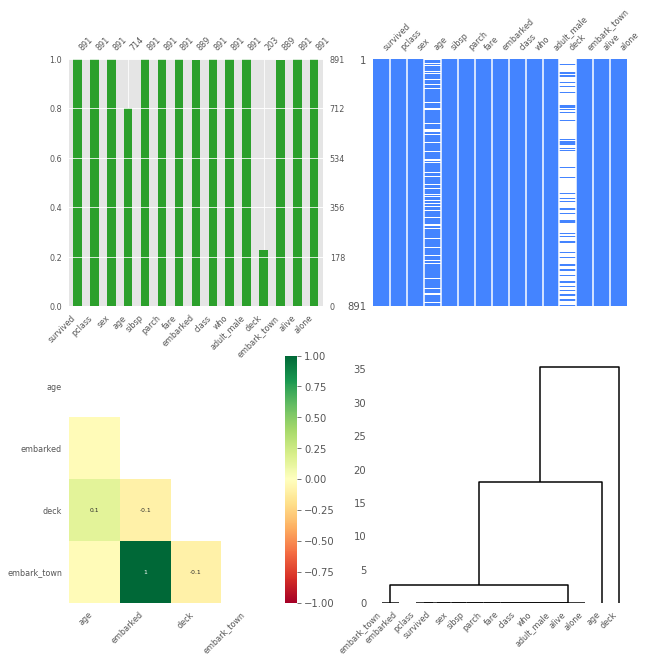

In [57]:
describe.missing_no(df)

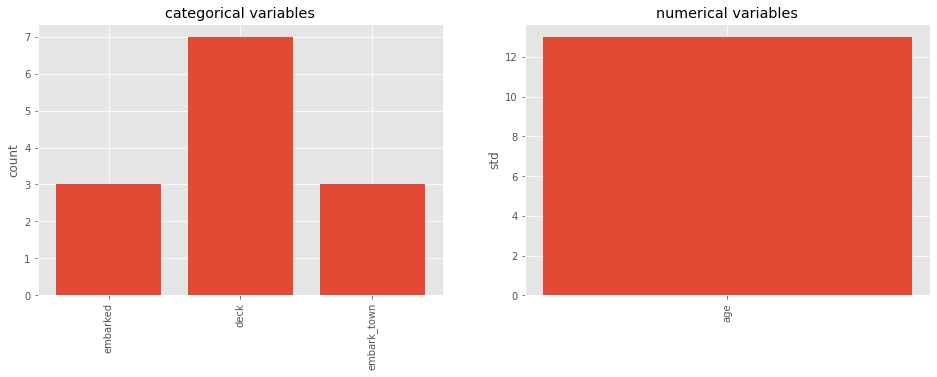

({'embarked': 3, 'deck': 7, 'embark_town': 3},
 {'age': 13.019696550973194},
 survived       0.000000
 pclass         0.000000
 sex            0.000000
 age            0.198653
 sibsp          0.000000
 parch          0.000000
 fare           0.000000
 embarked       0.002245
 class          0.000000
 who            0.000000
 adult_male     0.000000
 deck           0.772166
 embark_town    0.002245
 alive          0.000000
 alone          0.000000
 dtype: float64)

In [45]:
df1 = fe.change_type(df,['class','deck'],'object')
describe.fillna_separate_obj(df1,'unknown','median')